# Model Selection

Pada materi ini, kita akan membahas beberapa *supervised* model sekaligus. Kita akan coba bandingkan masing-masing performa model untuk menentukan model mana yang paling bagus sesuai dengan metrik yang dipilih.

Beberapa model yang akan kita bahas di antaranya:
* k-Nearest Neighbor (kNN)
* Support Vector Machine (SVM)
* Decision Tree


## k-Nearest Neighbor

*k-Nearest Neighbor* merupakan model *machine learning* yang tidak mempunyai parameter atau yang biasa disebut dengan **non-parametrik**. Hal ini dikarenakan proses belajar kNN tidak menghasilkan parameter apapun, beda halnya dengan model-model sebelumnya, seperti *linear regression* ataupun *logistic regression*.

kNN merupakan model yang paling sederhana dan bisa digunakan baik untuk *task* **klasifikasi** ataupun **regresi**.


### Cara Kerja kNN

Dalam memprediksi suatu data, kNN akan memanfaatkan mayoritas `k` tetangga yang paling dekat dengan data tersebut. Perhatikan ilustrasi berikut.

![](assets/images/knn.png)
sumber: [datacamp](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)

Misalkan kita ingin memprediksi data seperti pada gambar di atas. Maka, nilai prediksi akan berdasarkan `k` tetangga yang paling dekat, dalam hal ini $k = 1$. Sehingga, data tersebut akan diprediksi mirip dengan data berwarna merah.

![](assets/images/knn-algorithm.png)
sumber: [datacamp](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)

Sesuai ilustrasi di atas, algorithma dari kNN adalah:
1. Tentukan `k`
2. Masukkan semua data yang akan digunakan
3. Hitung jarak antara data yang ingin diprediksi dengan semua data yang ada
4. Prediksi nilai data tersebut berdasarkan mayoritas `k` tetangga terdekat dari data tersebut.

Umumnya:
* Untuk klasifikasi, prediksi akan ditentukan melalui *voting*
* Untuk regresi, prediksi akan ditentukan dengan cara menghitung rata-rata


### kNN pada Scikit-Learn

Sekarang, kita akan coba menggunakan kNN dengan scikit-learn. Kita akan coba gunakan data *california housing* yang disedikan oleh scikit-learn. Untuk menggunakan kNN, kita gunakan sintak berikut.

```python
from sklearn.neighbors import KNeighborsRegressor
```

> Untuk masalah klasifikasi, kita gunakan `KNeighborsClassifier`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

#### California Housing Dataset

In [ ]:
california_housing = fetch_california_housing(data_home="./data")

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Dari deskripsi data di atas, kita tahu bahwa:
* Terdapat 20.640 data
* Terdiri dari 8 kolom numerik yang tidak ada *missing value* sama sekali
* Variabel target adalah **median house value** dalam satuan ribuan dolar ($100,000)

In [ ]:
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.DataFrame(california_housing.target, columns=california_housing.target_names)

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


Pertama, kita bagi dulu dataset menjadi `train_set` dan `dev_set`.

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(
    X, y,
    test_size=.2,
    random_state=11
)

print(f"{len(X_train) = }.. {len(X_dev) = }")

len(X_train) = 16512.. len(X_dev) = 4128


### Model Training & Evaluation

Mari kita langsung coba definisikan dan latih model `kNeighborsRegressor`.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

pred_train = knn.predict(X_train)
pred_dev = knn.predict(X_dev)

mse_train = mean_squared_error(y_train, pred_train)
mse_dev = mean_squared_error(y_dev, pred_dev)

print(f"{mse_train = }.. {mse_dev = }")

mse_train = 0.7279888869891515.. mse_dev = 1.134529791104954


Sekarang, mari kita bandingkan performa model jika kita lakukan pra-pemrosesan data terlebih dahulu menggunakan `StandardScaler`.

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_dev = scaler.transform(X_dev)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(scaled_X_train, y_train)

pred_train = knn.predict(scaled_X_train)
pred_dev = knn.predict(scaled_X_dev)

mse_train = mean_squared_error(y_train, pred_train)
mse_dev = mean_squared_error(y_dev, pred_dev)

print(f"{mse_train = }.. {mse_dev = }")

mse_train = 0.27669857535847453.. mse_dev = 0.41882816727045247


> Kesimpulan apa yang bisa diambil dari kedua performa model tersebut?

## Support Vector Machine

Model selanjutnya adalah *support vector machine* atau yang biasa disingkat dengan SVM. SVM sedikit berbeda dengan model yang lain. Hal ini dikarenakan tujuan dari SVM selain meminimalkan eror, juga memaksimalkan margin atau pembatas antara masing-masing target kelas.

![](assets/images/svm.png)
sumber: [datacamp](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)

Misalkan kita punyai data GRE dari beberapa siswa, di mana **biru berarti diterima** dan **kuning berarti tidak diterima**. Jika kita ingin membuat sebuah _boundary_ yang bisa dengan tepat memisahkan data tersebut, maka ada beberapa skenario.

![](assets/images/1d-data.png)

1. Misalkan kita buat _boundary_ yang agak condong ke sebelah kiri atau dekat dengan data siswa yang tidak diterima.

![](assets/images/boundary-decision-left.png)

2. Kita juga bisa buat _boundary_ yang agak condong ke sebelah kanan atau dekat dengan data siswa yang diterima.

![](assets/images/boundary-decision-right.png)

3. Atau, kita juga bisa buat _boundary_ dengan jarak antara kedua kelas paling besar, seperti ilustrasi di bawah.

![](assets/images/boundary-decision-mid.png)

> **Konsep**
>
> Kira-kira _decision boundary mana yang akan kita pilih dan mampu mengklasifikasikan penerimaan siswa dengan tepat?

SVM berusaha untuk membuat _decision boundary_ yang memisahkan antar target _class_ dengan tepat dan dengan margin yang sebesar mungkin. Untuk detail cara kerja SVM, silakan lihat video berikut:

<div align="center">
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></div>


### SVM pada Scikit-Learn

Untuk menggunakan SVM pada scikit-learn, kita perlu mengimpor modulnya terlebih dahulu menggunakan sintaks berikut.

```python
from sklearn.svm import SVC
```

> Untuk masalah regresi, kita bisa gunakan `SVR`.


#### Data Loading

Kita akan menggunakan data *breast cancer* yang tersedia dalam scikit-learn melalui.

In [ ]:
cancer = load_breast_cancer()

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Dari deskripsi data di atas, kita tahu bahwa:
* Terdapat 569 data
* Terdiri dari 30 kolom numerik
* Terdapat 2 jenis kelas: *malignant* dan *benign*

In [ ]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=["class"])

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


Sama seperti sebelumnya, mari kita bagi data *cancer* menjadi `train_set` dan `dev_set`.

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(
    X, y,
    test_size=.2,
    random_state=111
)

print(f"{len(X_train) = }.. {len(X_dev) = }")

len(X_train) = 455.. len(X_dev) = 114


### Model Training & Evaluation

Sekarang, mari langsung kita coba gunakan SVM pada scikit-learn menggunakan `SVC`.

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

pred_train = svc.predict(X_train)
pred_dev = svc.predict(X_dev)

print(
    "Performance on training set:",
    classification_report(y_train, pred_train, target_names=cancer.target_names),
    sep="\n"
)
print(
    "Performance on dev set:",
    classification_report(y_dev, pred_dev, target_names=cancer.target_names),
    sep="\n"
)

Performance on training set:
              precision    recall  f1-score   support

   malignant       0.96      0.82      0.88       168
      benign       0.90      0.98      0.94       287

    accuracy                           0.92       455
   macro avg       0.93      0.90      0.91       455
weighted avg       0.92      0.92      0.92       455

Performance on dev set:
              precision    recall  f1-score   support

   malignant       0.95      0.84      0.89        44
      benign       0.91      0.97      0.94        70

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Decision Tree

Sama seperti model lainnya, _decision tree_ juga dapat digunakna untuk masalah **klasifikasi** ataupun **regresi**. Intuisi cara kerja _decision tree_ mirip dengan pengambilan keputusan manusia pada umumnya. Misalkan kita ingin memutuskan apakah sebaiknya kita memakai jaket atau tidak hari ini. Proses penentuan pada _decision tree_ digambarkan melalui ilustrasi berikut.

![](assets/images/decision-tree-jacket.png)
sumber: [_Grokking Machine Learning - Luis G. Serrano_](https://www.manning.com/books/grokking-machine-learning)

Secara umum, _decision tree_ tersusun dari **_node_** dan **_edge_**. _Node_ adalah tempat di mana suatu keadaan dipertanyakan sebelum mengambil keputusan, sedangkan _edge_ adalah percabangan yang menentukan beberapa kemungkinan keputusan.

Setiap _node_ yang memiliki percabangan setelahnya disebut dengan **_decision node_**, sedangkan _node_ yang tidak memiliki percabangan (_node_ paling terakhir) disebut dengan **_leaf nodes_**. Khusus untuk _node_ yang berada di puncak pohon disebut dengan **_root node_**.

![](assets/images/decision-tree-with-label.png)
sumber: [_Grokking Machine Learning - Luis G. Serrano_](https://www.manning.com/books/grokking-machine-learning)

> _decision tree_ yang memiliki **2 cabang untuk setiap _node_** disebut juga _binary decision tree_.


### Decision Tree pada Scikit-Learn

Untuk menggunakan _decision tree_ pada scikit-learn, kita perlu mengimpor modul berikut.

```python
from sklearn.tree import DecisionTreeClassifier
```

> khusus untuk masalah **regresi**, kita gunakan `DecisionTreeRegressor`.


#### Data Loading

Kita akan gunakan data sebelumnya, yaitu _breast cancer_.

In [ ]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=["class"])

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


Sama seperti sebelumnya, mari kita bagi data *cancer* menjadi `train_set` dan `dev_set`.

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(
    X, y,
    test_size=.2,
    random_state=111
)

print(f"{len(X_train) = }.. {len(X_dev) = }")

len(X_train) = 455.. len(X_dev) = 114


### Model Training & Evaluation

Sekarang, mari langsung kita coba gunakan _decision tree_ pada scikit-learn menggunakan `DecisionTreeClassifier`.

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

pred_train = dtree.predict(X_train)
pred_dev = dtree.predict(X_dev)

print(
    "Performance on training set",
    classification_report(y_train, pred_train, target_names=cancer.target_names),
    sep="\n"
)
print(
    "Performance on development set",
    classification_report(y_dev, pred_dev, target_names=cancer.target_names),
    sep="\n"
)

Performance on training set
              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00       168
      benign       1.00      1.00      1.00       287

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Performance on development set
              precision    recall  f1-score   support

   malignant       0.93      0.95      0.94        44
      benign       0.97      0.96      0.96        70

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### Tree Visualization

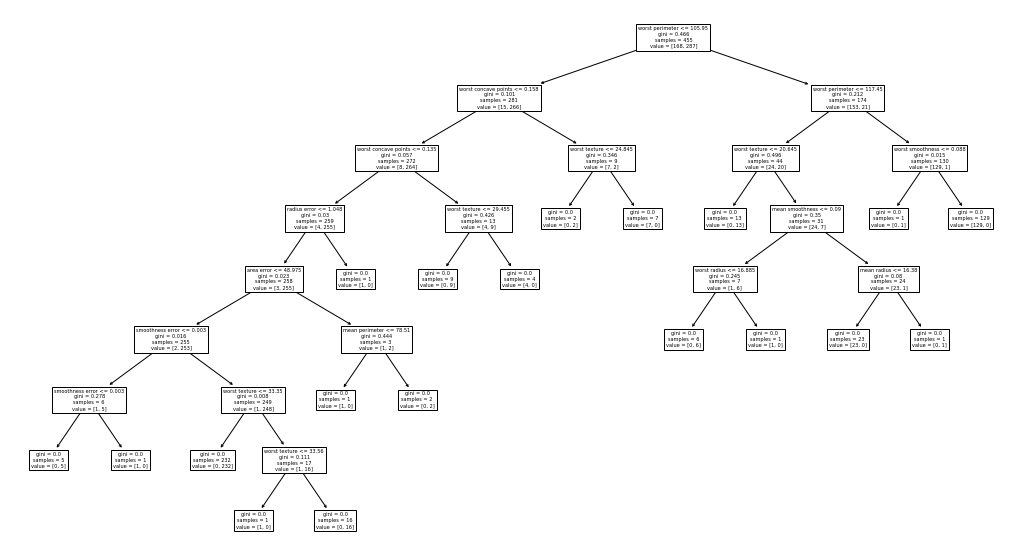

In [ ]:
plt.figure(figsize=(18, 10))
plot_tree(dtree, feature_names=cancer.feature_names)
plt.show()

## Hyperparamter Tuning

**_Hyperparameter_** adalah variabel-variabel yang harus kita definisikan sebelum _training_. Setiap model memiliki _hyperparameter_ yang berbeda-beda. Misalkan, _k-Nearest Neighbors_ memiliki _hyperparameter_ `k`.

> Meski begitu, umumnya, setiap model memiliki _hyperparameter_ yang sama, seperti **maksimum iterasi**.

Karena _hyperparameter_ juga menentukan bagaimana performa model, kita juga perlu menentukan terlebih dahulu konfigurasi _hyperparameter_ sedemikian sehingga model memiliki performa yang bagus, yaitu **tidak _underfit_** dan **tidak _overfit_**.

Ada beberapa cara untuk melakukan _hyperparameter tuning_, di antaranya adalah **_grid search_** dan **_random search_**. Kita akan coba bahas dan gunakan _grid search_ menggunakan scikit-learn.


### Grid Search

_Grid search_ merupakan salah satu cara untuk menentukan konfigurasi _hyperparameter_ terbaik dengan cara **melatih model menggunakan seluruh kombinasi yang mungkin** dari konfigurasi yang kita tentukan. Sebagai contoh, perhatikan ilustrasi berikut.

|    | `max_depth = 5` | `max_depth = 10` |
| -- | --------- | ---------- |
| `min_samples_split = 2` | ... | ... |
| `min_samples_split = 10` | ... | ... |
| `min_samples_split = 50` | ... | ... |

Kita bisa melakukan iterasi untuk setiap kombinasi dari 2 _hyperparameter_ tersebut secara manual. Namun, scikit-learn menyediakan modul `GridSearchCV` untuk implementasi yang lebih sederhana dan mudah. Untuk menggunakan `GridSearchCV`, kita perlu impor mengunakan sintaks berikut.

```python
from sklearn.model_selection import GridSearchCV
```

In [ ]:
max_depth_config = (5, 10)
min_samples_split_config = (2, 10, 50)

grid_search = GridSearchCV(
    dtree,
    param_grid={
        "max_depth": max_depth_config,
        "min_samples_split": min_samples_split_config
    }
)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': (5, 10),
                         'min_samples_split': (2, 10, 50)})

Untuk mengetahui konfigurasi terbaik dari _grid search_, kita bisa akses dengan properti `.best_params_`.

In [ ]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_split': 2}

Secara default, instance dari `GridSearchCV`, dalam hal ini `grid_search` adalah estimator atau model dengan performa yan paling bagus, atau yang menggunakan konfigurasi `best_params_` di atas. Meskipun, kita juga bisa akses model tersebut menggunakan properti `.best_estimator_`.

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5)

Mari kita bandingkan dengan performa model _decision tree_ sebelumnya pada _development set_.

In [ ]:
print(
    "Performance on development set (not using Grid Search)",
    classification_report(y_dev, pred_dev, target_names=cancer.target_names),
    sep="\n"
)
print(
    "Performance on development set (using Grid Search)",
    classification_report(y_dev, grid_search.predict(X_dev), target_names=cancer.target_names),
    sep="\n"
)

Performance on development set (not using Grid Search)
              precision    recall  f1-score   support

   malignant       0.91      0.93      0.92        44
      benign       0.96      0.94      0.95        70

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

Performance on development set (using Grid Search)
              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        44
      benign       0.97      0.97      0.97        70

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dfd595f9-5ce1-4500-8a69-d893df76283a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>